In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('petrol_consumption.csv')

x = df.iloc[:,:4]
y = df.iloc[::,4]

col = ['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']

df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9,3571,1976,0.525,541
1,9,4092,1250,0.572,524
2,9,3865,1586,0.580,561
3,7,4870,2351,0.529,414
4,8,4399,431,0.544,410


In [2]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,-0.039889,-0.306876,-0.214551,-0.320173
Average_income,-0.039889,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.306876,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.214551,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.320173,-0.244862,0.019042,0.698965,1.000000


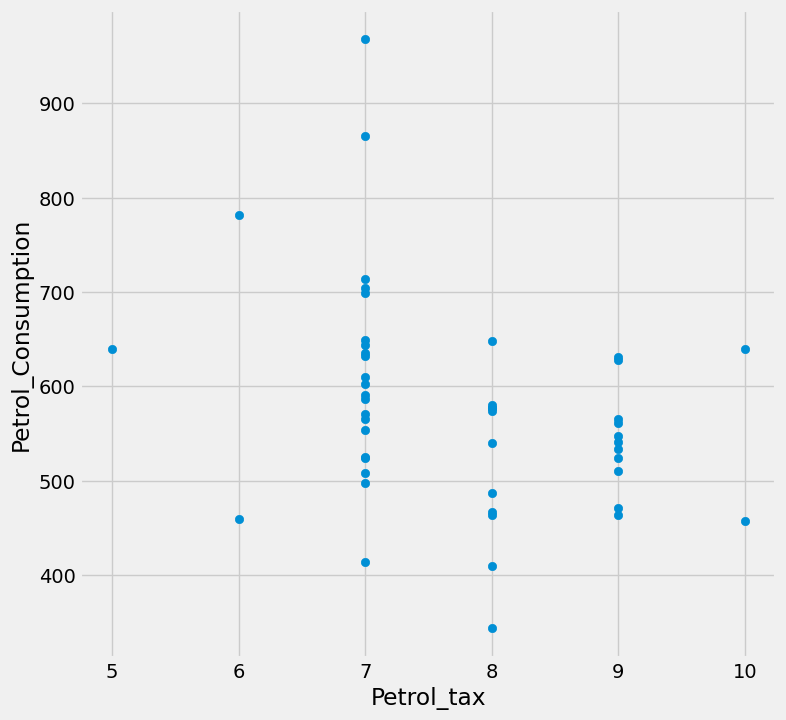

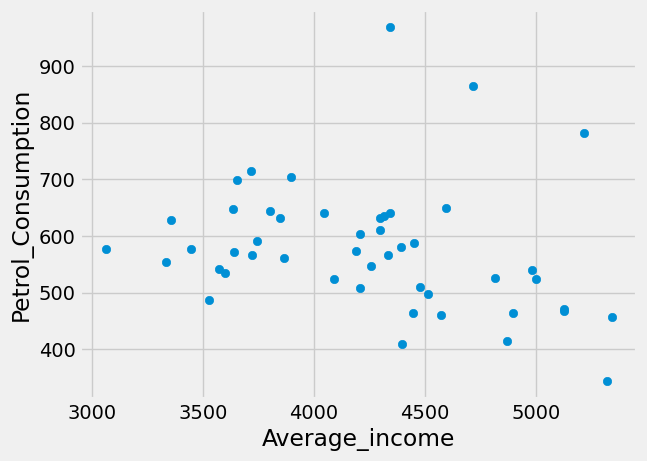

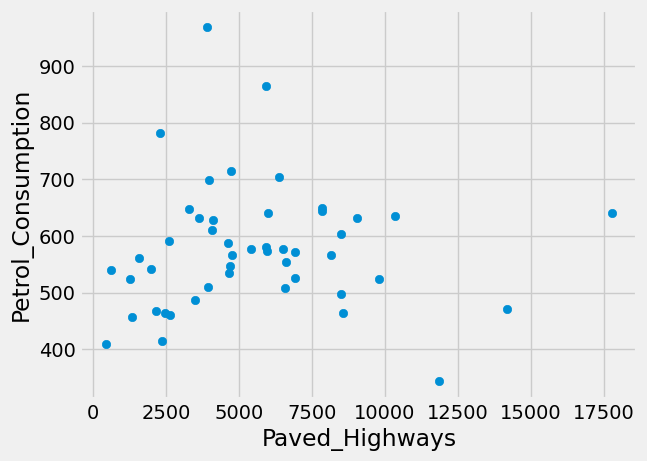

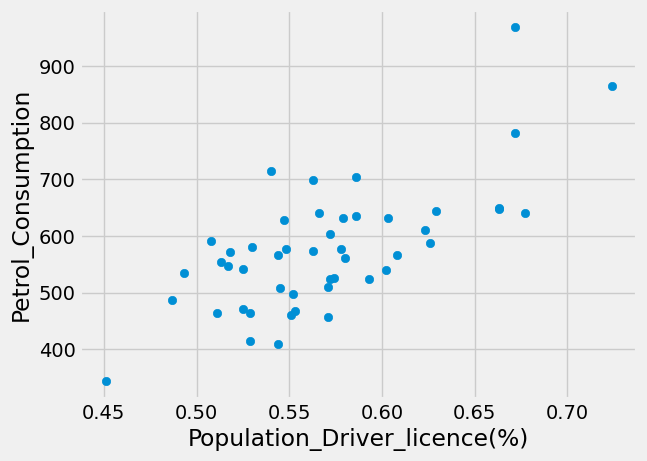

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

for i in col:
    plt.scatter(x=i, y='Petrol_Consumption' ,data=df)
    plt.ylabel('Petrol_Consumption')
    plt.xlabel(i)
    plt.show()

-------------------

In [4]:
model_l = LinearRegression()
model_l.fit(x, y)

LinearRegression()

In [5]:
y_pred = model_l.predict(x)

df['y_pred'] = y_pred

In [6]:
print(f'intercept_b0: {"%0.2f" % model_l.intercept_}')
print(f'coef_bn     : {model_l.coef_}')
print(f'score       : {"%0.2f" % model_l.score(x, y)}')


mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

print(f'mae: {"%0.2f" % mae}', f'mse: {"%0.2f" % mse}', f'rmse: {"%0.2f" % rmse}', sep='\n')

intercept_b0: 181.86
coef_bn     : [-1.78535225e+01 -7.15145164e-02  1.00957561e-03  1.45641581e+03]
score       : 0.65
mae: 50.50
mse: 4295.48
rmse: 65.54


In [7]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

sc = cross_val_score(LinearRegression(), x, y, cv= kf, scoring="neg_mean_squared_error")

n = 1
for i in sc:
    print(f'rmse: {n} {np.sqrt(-i)}')
    n += 1

print(f'best parametr: {min(np.sqrt(-sc))}')
print('rmse.mean()', np.sqrt(-sc.mean()))


rmse: 1 70.09521108508758
rmse: 2 106.52187510258496
rmse: 3 49.493363502698024
rmse: 4 67.56244840186922
rmse: 5 63.39604479610871
best parametr: 49.493363502698024
rmse.mean() 73.88312994600237


In [8]:
train_test_fold = []
number = 0
for train, test in kf.split(x, y):
    train_test_fold.append((train, test))
    print(number, 'train_size', len(train), 'test_size', len(test))
    number += 1

0 train_size 38 test_size 10
1 train_size 38 test_size 10
2 train_size 38 test_size 10
3 train_size 39 test_size 9
4 train_size 39 test_size 9


In [13]:
x_train, x_test, y_train, y_test = x.loc[train_test_fold[2][0]], x.loc[train_test_fold[2][1]], y.loc[train_test_fold[2][0]], y.loc[train_test_fold[2][1]]


In [14]:
model_l2 = LinearRegression()
model_l2.fit(x_train, y_train)

LinearRegression()

In [15]:
y_predict = model_l2.predict(x_test)

### Сравнение результатов

In [16]:
#### результаты модели регресии с кроссвалидацией

In [17]:
print(f'intercept_b0: {"%0.2f" % model_l2.intercept_}')
print(f'coef_bn     : {model_l2.coef_}')
print(f'score       : {"%0.2f" % model_l2.score(x_test, y_test)}')


mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = mse**0.5

print(f'mae: {"%0.2f" % mae}', f'mse: {"%0.2f" % mse}', f'rmse: {"%0.2f" % rmse}', sep='\n')

intercept_b0: 269.41
coef_bn     : [-2.30953658e+01 -8.71222475e-02 -5.92006674e-05  1.50343490e+03]
score       : 0.05
mae: 36.98
mse: 2449.59
rmse: 49.49


In [18]:
#### результаты модели регресии без кроссвалидации

In [19]:
print(f'intercept_b0: {"%0.2f" % model_l.intercept_}')
print(f'coef_bn     : {model_l.coef_}')
print(f'score       : {"%0.2f" % model_l.score(x_test, y_test)}')


mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

print(f'mae: {"%0.2f" % mae}', f'mse: {"%0.2f" % mse}', f'rmse: {"%0.2f" % rmse}', sep='\n')

intercept_b0: 181.86
coef_bn     : [-1.78535225e+01 -7.15145164e-02  1.00957561e-03  1.45641581e+03]
score       : 0.40
mae: 50.50
mse: 4295.48
rmse: 65.54


-------------------------------------------------

In [20]:
score_dec = cross_val_score(DecisionTreeRegressor(random_state=42), x, y, cv=kf, scoring='neg_mean_squared_error')

iterr = 0
for i in score_dec:
    print(iterr, np.sqrt(-i))
    iterr += 1
    
print('best_score :', min(np.sqrt(-score_dec)))
print('mean:  ', np.sqrt(-score_dec.mean()),'\n')
print(score_dec)

0 137.13642842075188
1 118.60227653801591
2 85.43242943987956
3 89.68215479619616
4 134.09035096613857
best_score : 85.43242943987956
mean:   115.06060238944616 

[-18806.4        -14066.5         -7298.7         -8042.88888889
 -17980.22222222]


In [21]:
score_dec2 = cross_val_score(RandomForestRegressor(random_state=42), x, y, cv=kf, scoring='neg_mean_squared_error')

iterr = 0
for i in score_dec2:
    print(iterr, np.sqrt(-i))
    iterr += 1
    
print('best_score :', min(np.sqrt(-score_dec2)))
print('mean:  ', np.sqrt(-score_dec2.mean()),'\n')
print(score_dec)

0 92.48100323850299
1 114.51177825883241
2 66.50703376335471
3 56.90616535627362
4 82.76873960352154
best_score : 56.90616535627362
mean:   85.06214759940066 

[-18806.4        -14066.5         -7298.7         -8042.88888889
 -17980.22222222]


----------------------

In [22]:
X_train, X_test, Y_train, Y_test = x.loc[train_test_fold[3][0]], x.loc[train_test_fold[3][1]], y.loc[train_test_fold[3][0]], y.loc[train_test_fold[3][1]
                                                                                                                                  ]

In [23]:
model_random_f = RandomForestRegressor(random_state=42)
model_random_f.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred_random = model_random_f.predict(X_test)
y_pred_random

array([594.6 , 624.08, 482.77, 512.58, 545.31, 632.36, 597.23, 609.59,
       785.75])

In [25]:
mae = mean_absolute_error(Y_test, y_pred_random)
mse = mean_squared_error(Y_test, y_pred_random)
rmse = mse**0.5

print(f'mae: {"%0.2f" % mae}', f'mse: {"%0.2f" % mse}', f'rmse: {"%0.2f" % rmse}', sep='\n')

mae: 45.29
mse: 3238.31
rmse: 56.91


----------------------------

In [26]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for i in estimators:
    score_rand_f = cross_val_score(RandomForestRegressor(random_state=42, n_estimators=i), x, y, cv=kf, scoring='neg_mean_squared_error')
    print(i,'score:',np.sqrt(-score_rand_f))
    
print('best_score:', min(np.sqrt(-score_rand_f)))

50 score: [ 95.77194328 118.42208797  67.45667321  57.65879098  74.10047413]
100 score: [ 92.48100324 114.51177826  66.50703376  56.90616536  82.7687396 ]
150 score: [ 92.72049276 114.59223743  65.42331796  53.84595165  81.50543743]
200 score: [ 90.57961308 114.09992811  65.04268523  53.00950075  82.09624078]
250 score: [ 90.82262549 114.53445601  65.92156374  52.37184353  82.40682926]
300 score: [ 92.43746437 114.97719043  66.47429242  51.96551746  83.53685583]
350 score: [ 93.66205721 116.08384815  65.01207182  52.75104936  84.42789856]
best_score: 52.7510493646363
